**IMPORTING REQUIRED LIBRARIES**

In [ ]:
# Importing all the required libraries
import requests
from bs4 import BeautifulSoup 
from google.colab import files
import json
from lxml.html import fromstring
import requests
from itertools import cycle
import traceback

**FUNCTION TO GET PROXIES, IF REQUIRED**

In [ ]:
def get_proxies():
  url = 'https://free-proxy-list.net/'
  response = requests.get(url)
  parser = fromstring(response.text)
  proxies = set()

  for i in parser.xpath('//tbody/tr')[:100]:
    if i.xpath('.//td[7][contains(text(),"yes")]'):
      proxy = ":".join([i.xpath('.//td[1]/text()')[0], i.xpath('.//td[2]/text()')[0]])
      proxies.add(proxy)
  return proxies

In [ ]:
proxies = get_proxies()
proxy_pool = cycle(proxies)

**GET-SOUP FUNCTION WITH PROXY ROTATION**

In [ ]:
# Function to get a soup from a given url using proxies 
def get_soup(url):
  #Get a proxy from the pool
  proxy = next(proxy_pool)
  response = requests.get(url,proxies={"http": proxy, "https": proxy})
  if response.status_code ==200:
    soup = BeautifulSoup(response.content, "html.parser") 
    return soup   
  elif response.status_code == 101:
    get_soup(url)    
  #return soup

**NORMAL FUNCTION TO GET SOUP**

In [ ]:
# Function to get a soup from a given url using proxies 
def get_soup(url):
  response = requests.get(url)
  soup = BeautifulSoup(response.content, "html.parser") 
  return soup   

**ACCESSING THE HINDU SITE**

In [ ]:
# Accessing TheHindu site
soup  = get_soup('https://www.thehindu.com/archive/web/2021/01/')

**LIST OF URLS FROM 6/1/21 TO 10/1/21**

In [ ]:
# Getting all the links using URL Pattern recognition 
string1 = 'https://www.thehindu.com/archive/web/2021/01/'
URL_List = []
for  i in range(6, 11):
  if i < 10:
    url = string1+ f'0{i}/'
  elif i==10:
    url = string1 + f'{i}/'
  URL_List.append(url)
URL_List

['https://www.thehindu.com/archive/web/2021/01/06/',
 'https://www.thehindu.com/archive/web/2021/01/07/',
 'https://www.thehindu.com/archive/web/2021/01/08/',
 'https://www.thehindu.com/archive/web/2021/01/09/',
 'https://www.thehindu.com/archive/web/2021/01/10/']

In [ ]:
URL_List[2:3]

['https://www.thehindu.com/archive/web/2021/01/08/']

**GETTING THE URLS WITHIN THE DATE-PAGES**

In [ ]:
# Finding all the links from 6/1/21 to 10/1/21
all_links =[]
count = 0
for link in URL_List[3:4]:
  temp_soup = get_soup(link)
  temp_div = temp_soup.find("div", class_="tpaper-container") 
  for lines in temp_div.find_all('li'):
    for link1 in lines.find_all('a', href= True):
      count+=1
      print(count)
      all_links.append(link1['href'])
len(all_links) 

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


394

In [ ]:
len(all_links)

394

In [ ]:
# Function to convert lists to strings 
def listToString(s): 
        # initialize an empty string
    str1 = "" 
        # traverse in the string  
    for ele in s: 
        str1 += ele     
    # return string  
    return str1

In [ ]:
# getting the number of doccuments in each day-URL
count_date_no = 5
count_list = []
for link in URL_List:
  count_date_no = count_date_no+1
  count_doc_no = 0
  temp_soup = get_soup(link)
  temp_div = temp_soup.find("div", class_="tpaper-container") 
  for lines in temp_div.find_all('li'):
    for link1 in lines.find_all('a', href= True):
      count_doc_no = count_doc_no +1
  count_list.append(count_doc_no)
  print(f"day {count_date_no} has {count_doc_no} documents")

day 6 has 307 documents
day 7 has 448 documents
day 8 has 386 documents
day 9 has 394 documents
day 10 has 338 documents


**SCRAPING ALL THE TEXT FROM EACH LINK AND STORING IT IN A LIST: p_list**

In [ ]:
# Getting all the paragraph elements in all the links scraped
p_list = []
header  = ['h1', 'h2']
for links in all_links:
  second_temp_soup = get_soup(links)
  data = ''
  str = []  
  for data in second_temp_soup.find_all(header):
    str.append(data.get_text()) 
  for data in second_temp_soup.find_all('p', class_=""):
    if data not in second_temp_soup.find_all("div", class_="printfooter"):
      str.append(data.get_text())
      finalstring = listToString(str)  
  p_list.append(finalstring) 

In [ ]:
len(p_list)

394

**LIST OF THE LENGTHS OF EACH ELEMENT IN p_list**

In [ ]:
# list of lengths of each element in P_LIST
element_list_length = []
for i in p_list:
  element_list_length.append(len(i))
element_list_length

[3882,
 2050,
 4365,
 3971,
 4156,
 2078,
 3068,
 6655,
 2192,
 4698,
 2756,
 2546,
 4855,
 4318,
 5673,
 4801,
 6395,
 1906,
 14334,
 6535,
 4205,
 1210,
 2906,
 2180,
 2694,
 1523,
 3763,
 5602,
 3308,
 4666,
 4418,
 4008,
 5950,
 2577,
 2942,
 3582,
 1552,
 4109,
 8249,
 1499,
 3274,
 1798,
 7067,
 5377,
 1422,
 3640,
 2173,
 2261,
 3418,
 1221,
 8638,
 2697,
 2024,
 2960,
 11437,
 1306,
 5543,
 6485,
 169,
 5166,
 5601,
 832,
 2603,
 5502,
 2988,
 2690,
 3454,
 4816,
 3138,
 2927,
 3818,
 2894,
 2548,
 3326,
 3063,
 2673,
 4067,
 2221,
 1858,
 4767,
 4777,
 3946,
 1383,
 1672,
 1764,
 1102,
 2247,
 1245,
 1887,
 1335,
 1960,
 969,
 2227,
 1523,
 1810,
 1239,
 2207,
 2418,
 2606,
 1276,
 2871,
 2014,
 2395,
 2958,
 3058,
 2567,
 2361,
 1540,
 1963,
 1393,
 2007,
 2625,
 3653,
 2479,
 2806,
 3068,
 1917,
 1189,
 1002,
 2314,
 2357,
 845,
 1386,
 1204,
 1647,
 2123,
 1536,
 1658,
 1354,
 2154,
 3274,
 1820,
 1437,
 1510,
 2359,
 2180,
 2339,
 2464,
 2497,
 1776,
 1400,
 2346,
 1496,
 

In [ ]:
# CREATING A DATAFRAME FOR VISUALIZATION
import pandas as pd 
df = pd.DataFrame(zip(p_list, element_list_length), columns = ['link','link_length'])

**VISUALIZATION**

3.208154532563961

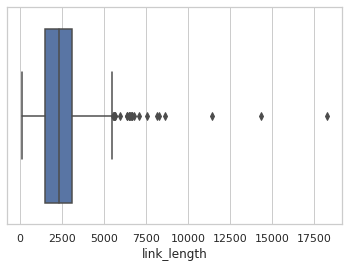

In [ ]:
# BOX-PLOT TO DETECT OUTLIERS AND CALCULATING THE SKEWNESS
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["link_length"])
df["link_length"].skew()

**OUTLIER TREATMENT**

In [ ]:
# DEFINING THE LOWER AN UPPER CUT-OFF
lower_cutoff = df['link_length'].quantile(0.05)
upper_cutoff = df['link_length'].quantile(0.95)

In [ ]:
# DROPPING THE ELEMENTS WHICH ARE NOT WITHIN THE CONFIDENCE RANGE FROM THE MAIN LIST 
outliers_list = []
temp = 0
for i in range(386):
  temp = df['link_length'].values[i]
  if (temp<lower_cutoff) or (temp>upper_cutoff):
    outliers_list.append(i)
for i in outliers_list:  
  df.drop(i, inplace = True)

**FINAL SKEWNESS OF THE DATAFRAME AFTER OUTLIER TRATMENT**

In [ ]:
df.skew()

link_length    0.653919
dtype: float64

In [ ]:
len(df)

346

**FINAL TEXT LIST: p_list_final**

In [ ]:
p_list_final = []
for i in range(len(df)):
  p_list_final.append(df['link'].values[i])
p_list_final

['\nCarrom challenge | Superb Arif in the lead \nHe had one ultimate slam\n\nHe had one ultimate slam\nThin marginMohammed Arif was in superlative form as he led the men’s field after the first round of the Champions League in the Indian online carrom challenge.In the eight-board contest, Arif, who had come through the preliminary and super league to join the elite Champions League, had one ultimate slam and was very vibrant, completing a board in a maximum of four chances. Arif had a cumulative score of six, 15 points better than second-placed Abhishek Chavan. Abhishek and Irshad Ansari also had an ultimate slam of start to finish without a miss.Sandeep Deorukhkar, Irshad, Abdul Rahman, Riyaz Akbar Ali, Mohd. Gufran and Prashant More were in the top eight position behind the leaders.The best eight from the preliminary stage were joined by 15 elite men players and 11 elite women players for the Champions League phase. The players will compete in four rounds and the top four will make t

**LIST OF NAMES OF ALL THE FILES**

In [ ]:
filename_list = []
name1 = "thehindu_jan_" 
name3 = ".json"
num1 = 8
for j in range(len(df)):
  num2 = j+1
  name2 = "_file_"
  x = "%s%s%s%s%s" % (name1, num1, name2, num2, name3)
  filename_list.append(x)
filename_list

['thehindu_jan_8_file_1.json',
 'thehindu_jan_8_file_2.json',
 'thehindu_jan_8_file_3.json',
 'thehindu_jan_8_file_4.json',
 'thehindu_jan_8_file_5.json',
 'thehindu_jan_8_file_6.json',
 'thehindu_jan_8_file_7.json',
 'thehindu_jan_8_file_8.json',
 'thehindu_jan_8_file_9.json',
 'thehindu_jan_8_file_10.json',
 'thehindu_jan_8_file_11.json',
 'thehindu_jan_8_file_12.json',
 'thehindu_jan_8_file_13.json',
 'thehindu_jan_8_file_14.json',
 'thehindu_jan_8_file_15.json',
 'thehindu_jan_8_file_16.json',
 'thehindu_jan_8_file_17.json',
 'thehindu_jan_8_file_18.json',
 'thehindu_jan_8_file_19.json',
 'thehindu_jan_8_file_20.json',
 'thehindu_jan_8_file_21.json',
 'thehindu_jan_8_file_22.json',
 'thehindu_jan_8_file_23.json',
 'thehindu_jan_8_file_24.json',
 'thehindu_jan_8_file_25.json',
 'thehindu_jan_8_file_26.json',
 'thehindu_jan_8_file_27.json',
 'thehindu_jan_8_file_28.json',
 'thehindu_jan_8_file_29.json',
 'thehindu_jan_8_file_30.json',
 'thehindu_jan_8_file_31.json',
 'thehindu_jan_8_

**CREATING AND SAVING JSON FILES ON THE GOOGLE DRIVE**

In [ ]:
# Creating and Downloading all the .json files
import json
for i in range(len(df)):
  dict1={}
  dict1["Text"] = p_list_final[i]
  with open(filename_list[i], "w") as f:
    json.dump(dict1, f)

In [ ]:
# Changing the location of all the files downloaded to their respective folders on the Google Drive
import shutil
index = 0
i = 8
for j in range(len(df)):
  shutil.move(f"/content/thehindu_jan_{i}_file_{j+1}.json", f"/content/drive/MyDrive/Jan0{i}")
index += 1